In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# 0. Загрузка, предобработка и визуализация обучающих и тестовых данных

In [2]:
df = pd.read_excel('data.xls')
df

,Дата\Час,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,2024-01-01,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,71.569,83.507,78.556,84.909,90.564,88.909,82.097,92.617,82.141,73.942
1,2024-01-02,66.159,60.323,59.934,58.991,65.926,68.814,71.955,83.094,91.835,...,81.973,81.159,81.542,85.174,86.396,88.637,99.631,85.428,79.096,75.569
2,2024-01-03,71.343,63.534,62.930,60.751,66.287,75.827,78.634,83.226,94.694,...,93.846,92.801,97.032,99.990,95.810,93.359,95.478,106.440,88.563,74.330
3,2024-01-04,75.556,63.900,64.464,62.335,70.257,78.144,83.858,82.886,89.696,...,83.695,81.513,84.233,89.340,95.338,91.403,102.215,104.527,94.472,79.269
4,2024-01-05,71.686,68.831,65.909,62.263,69.186,75.471,82.833,84.923,93.299,...,78.899,85.246,79.152,93.942,97.796,93.284,99.573,100.742,84.996,78.969
5,2024-01-06,73.126,65.977,60.801,58.350,67.161,73.432,82.197,84.655,92.029,...,82.673,93.242,99.498,85.793,85.644,87.579,90.410,98.107,83.345,76.698
6,2024-01-07,70.194,64.076,60.801,57.808,66.078,72.292,81.361,82.558,86.909,...,79.911,83.685,86.571,87.098,89.678,90.833,87.884,94.471,79.111,71.057
7,2024-01-08,63.734,59.919,59.467,57.143,65.526,72.938,76.957,81.825,89.929,...,81.346,82.652,79.955,83.505,89.544,87.480,99.437,83.900,81.100,73.498
8,2024-01-09,66.453,60.866,60.658,61.550,65.994,73.093,81.675,89.286,103.758,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


Датасет представляет собой объемы трафика, переданного через порт сетевого устройства, записанные с интервалом в 1 час с 12 часов 01.01.2024 г. по 11 часов 09.01.2024 г.

Избавимся от столбца 'Дата\Час', т.к. по сути это есть счетчик 

In [3]:
df = df.drop(columns='Дата\Час')
df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,71.569,83.507,78.556,84.909,90.564,88.909,82.097,92.617,82.141,73.942
1,66.159,60.323,59.934,58.991,65.926,68.814,71.955,83.094,91.835,84.601,...,81.973,81.159,81.542,85.174,86.396,88.637,99.631,85.428,79.096,75.569
2,71.343,63.534,62.930,60.751,66.287,75.827,78.634,83.226,94.694,91.789,...,93.846,92.801,97.032,99.990,95.810,93.359,95.478,106.440,88.563,74.330
3,75.556,63.900,64.464,62.335,70.257,78.144,83.858,82.886,89.696,90.817,...,83.695,81.513,84.233,89.340,95.338,91.403,102.215,104.527,94.472,79.269
4,71.686,68.831,65.909,62.263,69.186,75.471,82.833,84.923,93.299,95.227,...,78.899,85.246,79.152,93.942,97.796,93.284,99.573,100.742,84.996,78.969
5,73.126,65.977,60.801,58.350,67.161,73.432,82.197,84.655,92.029,92.149,...,82.673,93.242,99.498,85.793,85.644,87.579,90.410,98.107,83.345,76.698
6,70.194,64.076,60.801,57.808,66.078,72.292,81.361,82.558,86.909,83.413,...,79.911,83.685,86.571,87.098,89.678,90.833,87.884,94.471,79.111,71.057
7,63.734,59.919,59.467,57.143,65.526,72.938,76.957,81.825,89.929,90.488,...,81.346,82.652,79.955,83.505,89.544,87.480,99.437,83.900,81.100,73.498
8,66.453,60.866,60.658,61.550,65.994,73.093,81.675,89.286,103.758,136.804,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [4]:
data = np.array(df).flatten()       # преобразование в плоский массив
data = data[12:200]                # нули в начале и конце временного ряда будут "путать" модель, предложено от них избавиться
data, data.shape

(array([ 83.915,  74.879,  71.569,  83.507,  78.556,  84.909,  90.564,
         88.909,  82.097,  92.617,  82.141,  73.942,  66.159,  60.323,
         59.934,  58.991,  65.926,  68.814,  71.955,  83.094,  91.835,
         84.601,  81.881,  79.911,  88.205,  81.72 ,  81.973,  81.159,
         81.542,  85.174,  86.396,  88.637,  99.631,  85.428,  79.096,
         75.569,  71.343,  63.534,  62.93 ,  60.751,  66.287,  75.827,
         78.634,  83.226,  94.694,  91.789,  90.805,  87.272,  84.488,
         82.505,  93.846,  92.801,  97.032,  99.99 ,  95.81 ,  93.359,
         95.478, 106.44 ,  88.563,  74.33 ,  75.556,  63.9  ,  64.464,
         62.335,  70.257,  78.144,  83.858,  82.886,  89.696,  90.817,
         86.275,  87.51 ,  91.513,  84.024,  83.695,  81.513,  84.233,
         89.34 ,  95.338,  91.403, 102.215, 104.527,  94.472,  79.269,
         71.686,  68.831,  65.909,  62.263,  69.186,  75.471,  82.833,
         84.923,  93.299,  95.227,  93.383,  96.088,  91.   ,  82.422,
      

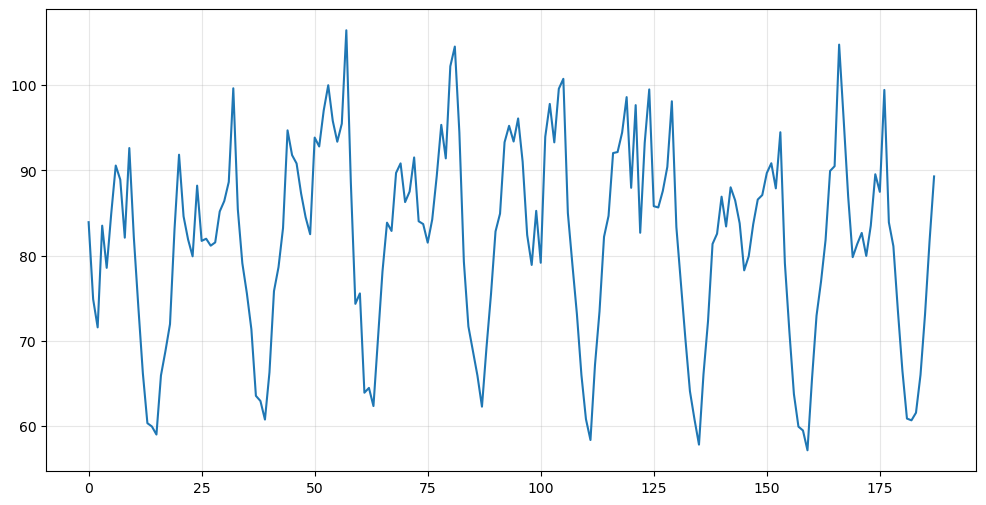

In [5]:
plt.figure(figsize=(12,6))
plt.plot(data)
plt.grid(alpha=.3);

# 1. Разбиение выборки на обучающие и тестовые подвыборки

In [6]:
train_size = 150
bias = 5

train_data = data[:train_size]
val_data = data[train_size + bias:]

train_data.shape, val_data.shape

((150,), (33,))

In [7]:
hist = 7            # длина истории
future = 10         # горизонт предсказания

# параметры обучения модели
batch_size = 16
epochs = 20

In [8]:
start = hist + future
end = start + train_size

print(start, end)

X_train = train_data
y_train = data[start:end]

x_end = len(val_data) - hist - future
label_start = len(train_data) + bias + hist + future
print(x_end, label_start)

X_val = val_data[:x_end]
y_val = data[label_start:]

17 167
16 172


In [9]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((150,), (150,), (16,), (16,))

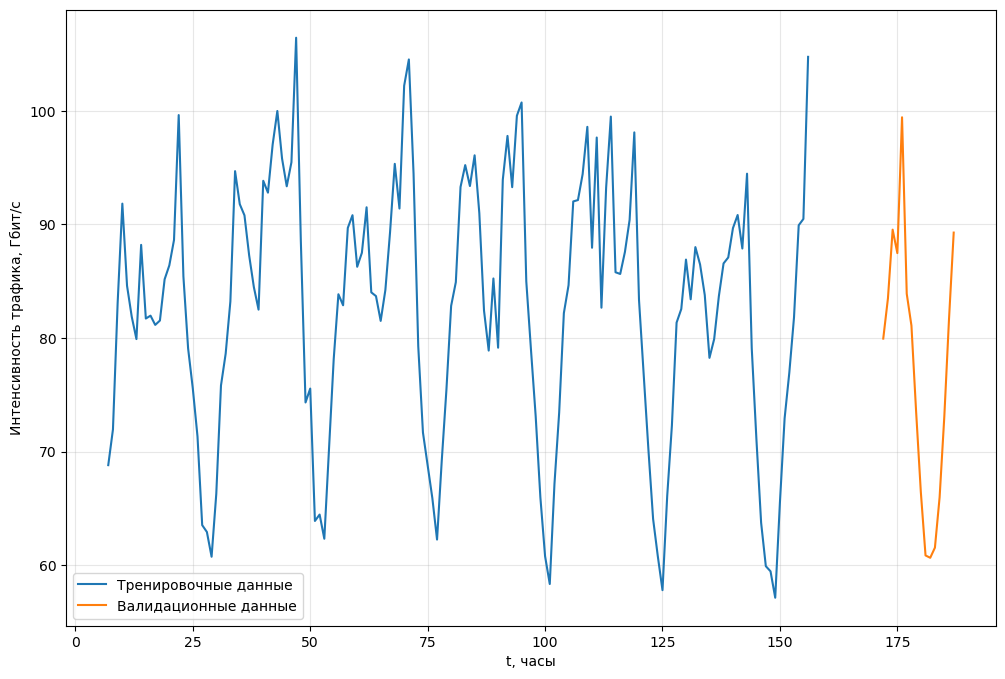

In [22]:
plt.figure(figsize=(12,8))
plt.plot(range(hist, y_train.shape[0] + hist), y_train, label='Тренировочные данные')
plt.plot(range(y_train.shape[0] + hist + bias + future,
               y_train.shape[0] + hist + bias + future + y_val.shape[0]),
               y_val,
               label='Валидационные данные')
plt.grid('on', alpha=.3)
plt.xlabel('t, часы')
plt.ylabel('Интенсивность трафика, Гбит/c')
plt.legend(loc='best');

# 2. Формирование `timeseries_dataset`

In [11]:
from tensorflow.keras.preprocessing import timeseries_dataset_from_array

dataset_train = timeseries_dataset_from_array(
    X_train, y_train,
    sequence_length=hist,
    sampling_rate=1,
    batch_size=batch_size
)

dataset_val = timeseries_dataset_from_array(
    X_val, y_val,
    sequence_length=hist,
    sampling_rate=1,
    batch_size=batch_size
)

2024-01-10 19:40:55.489599: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
for batch in dataset_train:
    inputs, targets = batch
    print('Input shape: ', inputs.shape)
    print(inputs[1])
    print("Target shape:", targets.shape)
    print(targets[1])
    break

Input shape:  (16, 7)
tf.Tensor([74.879 71.569 83.507 78.556 84.909 90.564 88.909], shape=(7,), dtype=float64)
Target shape: (16,)
tf.Tensor(71.955, shape=(), dtype=float64)


# 3. Конструирование и обучение ИНС

In [13]:
from keras.layers import LSTM, Conv1D, Dense, Flatten
from keras.models import Sequential
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_mae', patience=5)

model = Sequential()
model.add(LSTM(64, input_shape = (inputs.shape[1], 1), return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(Conv1D(32, kernel_size=3, activation='relu'))
model.add(Conv1D(64, kernel_size=1, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mae', optimizer='Adam', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 64)             16896     
                                                                 
 lstm_1 (LSTM)               (None, 7, 64)             33024     
                                                                 
 conv1d (Conv1D)             (None, 5, 32)             6176      
                                                                 
 conv1d_1 (Conv1D)           (None, 5, 64)             2112      
                                                                 
 flatten (Flatten)           (None, 320)               0         
                                                                 
 dense (Dense)               (None, 10)                3210      
                                                                 
 dense_1 (Dense)             (None, 1)                 1

In [14]:
history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[early_stop]
)

Epoch 1/20
9/9 [==============================] - 8s 179ms/step - loss: 82.1807 - mae: 82.1807 - val_loss: 79.6438 - val_mae: 79.6438
Epoch 2/20
9/9 [==============================] - 0s 33ms/step - loss: 80.4244 - mae: 80.4244 - val_loss: 76.2069 - val_mae: 76.2069
Epoch 3/20
9/9 [==============================] - 0s 36ms/step - loss: 74.2189 - mae: 74.2189 - val_loss: 65.2329 - val_mae: 65.2329
Epoch 4/20
9/9 [==============================] - 1s 67ms/step - loss: 57.1695 - mae: 57.1695 - val_loss: 38.7293 - val_mae: 38.7293
Epoch 5/20
9/9 [==============================] - 0s 43ms/step - loss: 23.7784 - mae: 23.7784 - val_loss: 12.9569 - val_mae: 12.9569
Epoch 6/20
9/9 [==============================] - 0s 33ms/step - loss: 12.2497 - mae: 12.2497 - val_loss: 8.2570 - val_mae: 8.2570
Epoch 7/20
9/9 [==============================] - 0s 33ms/step - loss: 11.0676 - mae: 11.0676 - val_loss: 9.7475 - val_mae: 9.7475
Epoch 8/20
9/9 [==============================] - 0s 32ms/step - loss: 1

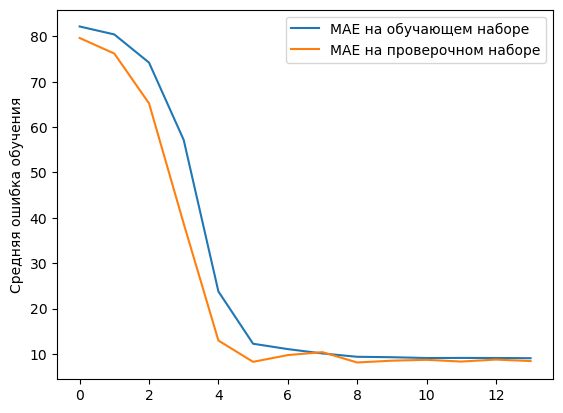

In [15]:
plt.plot(history.history['mae'][:], label='MAE на обучающем наборе')
plt.plot(history.history['val_mae'][:], label='MAE на проверочном наборе')

plt.ylabel('Средняя ошибка обучения')
plt.legend();

# 4. Визуализация предсказаний ИНС

In [16]:
pred = model.predict(dataset_train).flatten()
pred_val = model.predict(dataset_val).flatten()

1/1 [==============================] - 0s 92ms/step


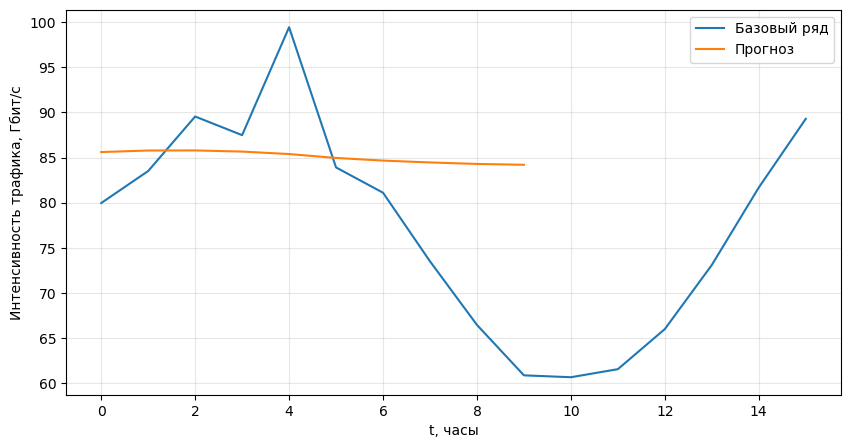

In [20]:
# проверка на валидационных данных

start = 0
step = 50
plt.figure(figsize=(10, 5))
plt.grid(alpha=.3)
plt.plot(y_val[start: start + step], label='Базовый ряд')
plt.plot(pred_val[start: start + step], label='Прогноз')
plt.xlabel('t, часы')
plt.ylabel('Интенсивность трафика, Гбит/c')
plt.legend();


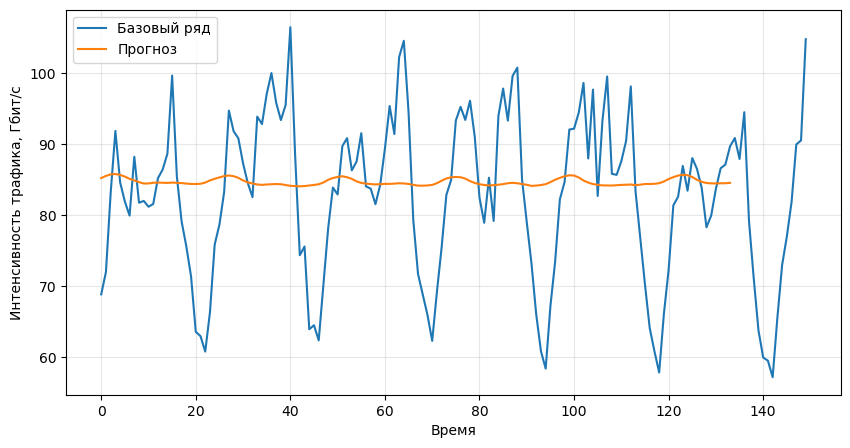

In [19]:
# проверка на обучающих данных

start = 0

plt.figure(figsize=(10, 5))
plt.grid(alpha=.3)
plt.plot(y_train[start: train_size],
         label='Базовый ряд')
plt.plot(pred[future + start: future + train_size],
         label='Прогноз')
plt.xlabel('Время')
plt.ylabel('Интенсивность трафика, Гбит/c')
plt.legend()
plt.show()

# 5. Выводы

Несмотря на то, что ИНС в среднем показала хорошие рехультаты обучения (средняя абсолютная ошибка на валидации составила 8.4292 после 14 эпох обучения), визулазиция предсказаний ИНС показала, что только на обучающих данных она смогла частично обнаружить скрытые зависимости во временном ряду. Это можно связать с тем, что:

- ИНС обучалась только на одном признаке – самом временном ряду, дополнительных признаков в датасете не было;
- объем выборки слишком мал для качественной валидации ИНС.